In [0]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [0]:
#Read the data from the given dataset
df = pd.read_csv('cardio_train.csv',sep=";")

In [7]:
#See the shape of data
df.shape

(70000, 13)

In [8]:
#See the first 5 entries
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
#Check if any data is missing
df.isnull().values.any()

False

In [10]:
#To check the number of cardio and non-cardio data
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

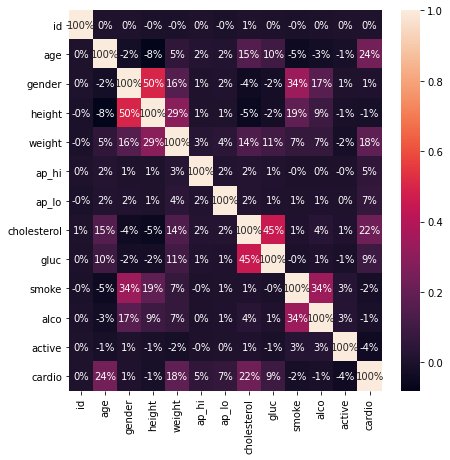

In [11]:
#Let's visualize the correlation between the various features of the data

plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [0]:
#We don't need the id column and hence let's remove it from our data frame
df = df.drop('id',axis=1)

In [0]:
#Lets split our X and Y values

X = df.iloc[:,:-1].values
Y = df.iloc[:, -1].values

In [0]:
#Split the data into Train and Test Sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# Perform Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [15]:
#Let's create and train our model
#I am using Random Forest Classifier

model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1)
model.fit(X_train,Y_train)

#Accuracy

model.score(X_train,Y_train)

0.979904761904762

In [19]:
cm = confusion_matrix(Y_test, model.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

#Lets print the confusion matrix


print(cm)


print("Model Test Accuracy = {}".format((TP+TN)/(TP+TN+FN+FP)))

[[6487 2122]
 [3093 5798]]
Model Test Accuracy = 0.702


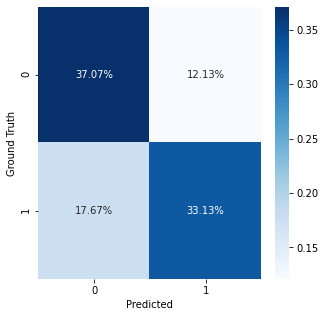

In [29]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.show()